# 1 Import Data

In [120]:
### Read downloaded Json file from DynamoDB
import  pandas as pd
%matplotlib inline
pd.options.display.max_rows=10
pd.options.display.max_columns=8

df = pd.read_json('C:\\Users\\tyyg\\Dropbox\\Personal Team Folder\\Sample Project A Tony\\tweets_bank.json')
df

,twitter
0,"{'username': 'amanda_cr', 'location': 'Costa R..."
1,"{'username': 'Fedorov Sergey', 'location': 'Uk..."
2,"{'username': 'AVRELY', 'location': 'Galaktikos..."
3,"{'username': 'Faisal F', 'location': 'Ontario,..."
4,"{'username': 'tk21', 'location': 'None', 'geo'..."
...,...
17923,"{'username': 'Steve', 'location': 'Milano', 'g..."
17924,"{'username': '????', 'location': 'None', 'geo'..."
17925,"{'username': 'Angela Green', 'location': 'None..."
17926,"{'username': '????????? ???????', 'location': ..."


In [121]:
### format Json file to dataframe
df=pd.read_json(df['twitter'].to_json(),orient='index')
df

,created_at,followers_count,geo,id,location,screen_name,tweet,username
0,2016-12-18 07:41:23,105,None,810389482939748352,Costa Rica,amanda_cr,Fiesta Navidad Scotiabank Pty! https://t.co/SO...,amanda_cr
1,2016-12-18 08:00:11,393,None,810394214244741120,"Ukraine, Nikolaev",TJ_YourChoice,RT @moskandogg: https://t.co/iCKbwo9aJM,Fedorov Sergey
10,2016-12-18 08:09:34,1430,None,810396572806692864,None,job_canada_,"Scotiabank: Administrative Assistant (Toronto,...",JOBS Canada
100,2016-12-18 09:28:24,199,None,810416412372111360,None,alekk,RT @azazet: \n \nhttps://t.co/M1,????
1000,2016-12-21 03:14:18,993,None,811409431837769728,Ohio,BrentWrightWeb,RT @cavs: KYRI3 DEEP IN THE BMO \n#DefendtheLand,Brent Wright
...,...,...,...,...,...,...,...,...
9995,2016-12-24 05:48:43,1565,"{u'type': u'Point', u'coordinates': [50.995594...",812535454843146240,"Calgary, Alberta",MapleLeaf_Tom,Going to the movies (@ Scotiabank Theatre - @c...,Thomas
9996,2016-12-24 05:49:28,338,None,812535644153061376,Toronto,ChicagoCuddz,@Raptors @BMO Great game #Raptors \n#WeTheNorth,IG: NotOfThisCod ?
9997,2016-12-24 05:49:53,106,None,812535749648257024,None,wasimulc,@Raptors @BMO SHADE,TheSlugger
9998,2016-12-24 05:50:00,2376,None,812535778865741824,"London, England",gimletech,Wall St is expecting 4.86% YoY revenue growth ...,Value Gimletech


In [122]:
# classify tweets into bank
bank = [None]*len(df.index)
for i in range(len(df.index)):
    if "CIBC" in df.loc[i]['tweet'].upper():bank[i]='CIBC'
    elif 'RBC' in df.loc[i]['tweet'].upper(): bank[i]='RBC'
    elif 'SCOTIABANK' in df.loc[i]['tweet'].upper(): bank[i]='Scotiabank'
    elif 'BMO' in df.loc[i]['tweet'].upper(): bank[i]='BMO'
    elif 'TD' in df.loc[i]['tweet'].upper(): bank[i]='TD'
df['bank']=bank


In [123]:
for i in df.index:
    if(df.loc[i,'bank']== None):
        df=df.drop(i)

# Text Pre-processing

###### All tweets are processed to remove unnecessary things like links, non-English words, stopwords, punctuation’s, etc.

In [124]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
import nltk
tweets_texts = df["tweet"].tolist()
stopwords=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
def process_tweet_text(tweet):
    if tweet.startswith('@null'): return "[Tweet not available]"
    tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
    tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
    twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
    tokens = twtok.tokenize(tweet)
    tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 and  
                                                 i in english_vocab]
    return tokens

cleaned_tweets = []
for tw in tweets_texts:
    words = process_tweet_text(tw)
    cleaned_tweet = " ".join(w for w in words if len(w) > 2 and 
w.isalpha()) #Form sentences of processed words
    cleaned_tweets.append(cleaned_tweet)
df['CleanTweetText'] = cleaned_tweets

df['tweet']=cleaned_tweets

In [125]:
for i in df.index:
    if(df.loc[i,'tweet']=='' or df.loc[i,'tweet']==' ' ):
        df=df.drop(i)

In [135]:
df=df.drop_duplicates()
df=df.sort_index()
df=df.reindex(range(len(df.index)),method='bfill')
df

,created_at,followers_count,geo,id,...,tweet,username,bank,CleanTweetText
0,2016-12-18 08:05:08,132768,None,810395458346459136,...,open winning,EntornoInteligente,RBC,open winning
1,2016-12-18 08:05:08,132768,None,810395458346459136,...,open winning,EntornoInteligente,RBC,open winning
2,2016-12-18 08:05:08,132768,None,810395458346459136,...,open winning,EntornoInteligente,RBC,open winning
3,2016-12-18 08:05:08,132768,None,810395458346459136,...,open winning,EntornoInteligente,RBC,open winning
4,2016-12-18 08:05:08,132768,None,810395458346459136,...,open winning,EntornoInteligente,RBC,open winning
...,...,...,...,...,...,...,...,...,...
6247,2016-12-23 07:02:42,24994,None,812191686361317376,...,parfait,Übergizmo France,CIBC,parfait
6248,2016-12-23 07:05:29,1079,None,812192388647153664,...,account always locked get,Yamileth Aguilar,Scotiabank,account always locked get
6249,2016-12-23 07:05:29,1079,None,812192388647153664,...,account always locked get,Yamileth Aguilar,Scotiabank,account always locked get
6250,2016-12-23 07:05:29,1079,None,812192388647153664,...,account always locked get,Yamileth Aguilar,Scotiabank,account always locked get


## Exploration

In [137]:
### Sentiment analysis
### Send tweets to text-processing.com via HTTP
import requests

url = 'https://japerk-text-processing.p.mashape.com/sentiment/'
header = {'X-Mashape-Key': 'hqvR8aeU6DmshHGgpGaompgKozF3p1n3S46jsngtsamUeIH1gq',
          'Content-Type': 'application/x-www-form-urlencoded',
          'Accept': 'application/json'}

response=[None]*len(df)
for i in df.index:
    data = {"language": "english","text":df.loc[i]['tweet']}
    response[i] = requests.post(url,data=data,headers=header).json()

    
for i in range(len(response)): df.loc[i,'sentiment']=response[i]['label']

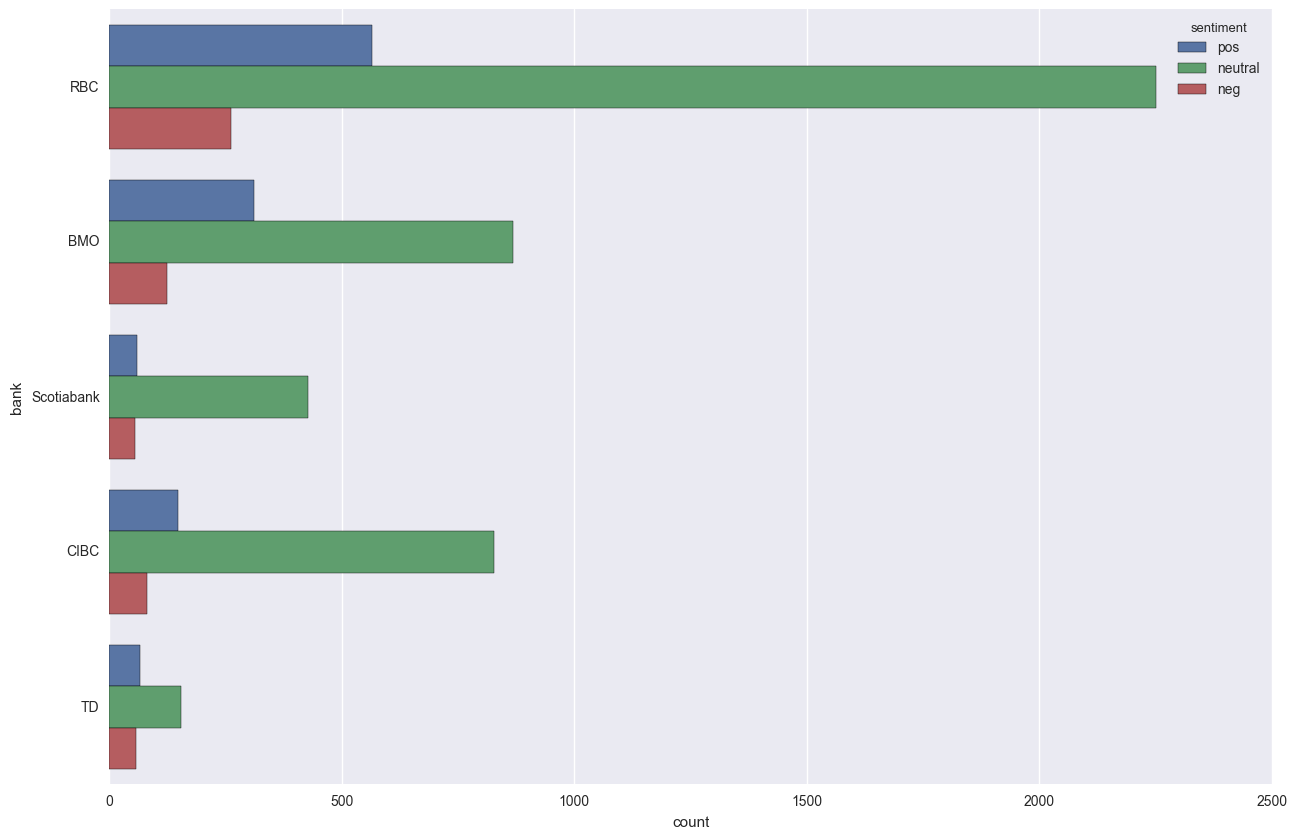

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
df.pipe((sns.countplot,'data'), y="bank", hue="sentiment")

In [145]:
from wordcloud import WordCloud,STOPWORDS
df=df[df['sentiment']=='neg']
words = ' '.join(df['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word.lower()
                                 and 'cibc' not in word.lower()
                         and 'bmo' not in word.lower()
                         and 'rbc' not in word.lower()
                         and 'scotiabank' not in word.lower()
                         and 'td' not in word.lower()
                         and 'bank' not in word.lower()
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

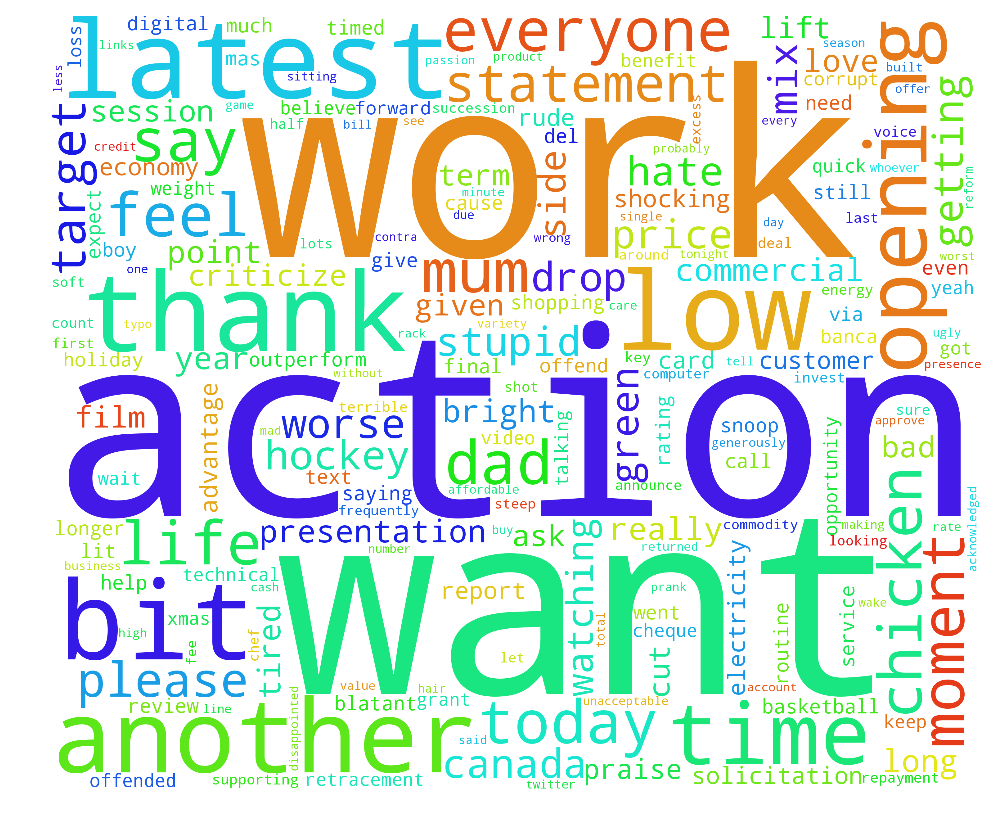

In [148]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()